# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


### Create data to view and fit

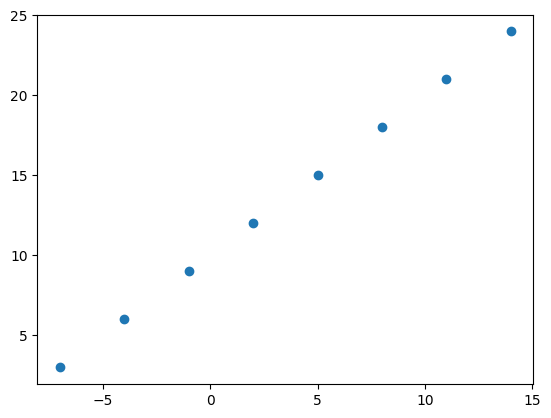

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create Features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create Labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize
plt.scatter(X,y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output Shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

### Steps in modelling with TensorFlow

1. **Create a model** - define the input and output layers as well as the hidden layers if you are using deep learning
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer(tells out model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of a mdoel)
3. **Fitting a model** - letting the model try to find the patterns X & y (features & labels)


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
    )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 538ms/step - loss: 12.9697 - mae: 12.9697
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 12.8372 - mae: 12.8372
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 12.7047 - mae: 12.7047
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 12.5722 - mae: 12.5722
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 12.4397 - mae: 12.4397


In [ ]:
# Try to make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 143ms/step


array([[5.600613]], dtype=float32)

### Improving our model

In [ ]:
# Improve Model Changing Epochs
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

# Try to make a prediction using our model
y_pred = model.predict([17.0])
y_pred

Epoch 1/100
1/1 [==============================] - 0s 21ms/step - loss: 12.3072 - mae: 12.3072
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.1747 - mae: 12.1747
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 12.0422 - mae: 12.0422
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 11.9097 - mae: 11.9097
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 11.7772 - mae: 11.7772
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 11.6447 - mae: 11.6447
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 11.5122 - mae: 11.5122
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 11.3797 - mae: 11.3797
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 11.2472 - mae: 11.2472
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 11.1147 - mae: 11.1147
Epoch 11/100
1/1 [==============================] -

array([[29.653107]], dtype=float32)

In [ ]:
# 1. Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
    )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

# Try to make a prediction using our model
y_pred = model.predict([17.0])
y_pred

Epoch 1/100
1/1 [==============================] - 0s 422ms/step - loss: 13.8741 - mae: 13.8741
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3747 - mae: 13.3747
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8792 - mae: 12.8792
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3885 - mae: 12.3885
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.9034 - mae: 11.9034
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 11.4150 - mae: 11.4150
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9095 - mae: 10.9095
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.3989 - mae: 10.3989
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 9.8623 - mae: 9.8623
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 9.3002 - mae: 9.3002
Epoch 11/100
1/1 [==============================] - 0

array([[32.093124]], dtype=float32)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100,activation=None))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
    metrics=["mae"]
    )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

# Try to make a prediction using our model
y_pred = model.predict([17.0])
y_pred

Epoch 1/100
1/1 [==============================] - 1s 582ms/step - loss: 14.2815 - mae: 14.2815
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2895 - mae: 13.2895
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.3131 - mae: 12.3131
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 11.3470 - mae: 11.3470
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.3825 - mae: 10.3825
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.4108 - mae: 9.4108
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.4241 - mae: 8.4241
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 7.4148 - mae: 7.4148
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 6.7336 - mae: 6.7336
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.1011 - mae: 7.1011
Epoch 11/100
1/1 [==============================] - 0s 10ms

array([[26.149937]], dtype=float32)

### Evaluating Model

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

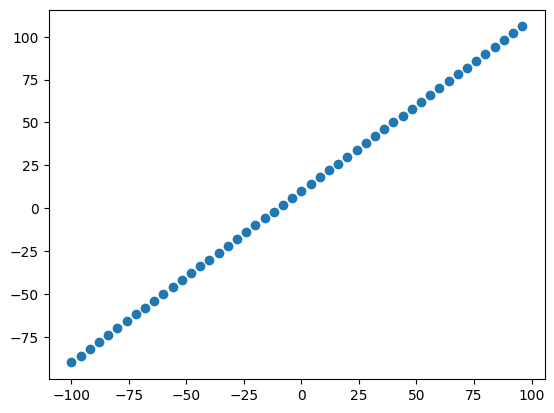

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 Sets

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* test set - the model gets evaluated on this data to test what is learned, this set is typically 10-15% of the total data available

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing the samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualize Train & Test Data

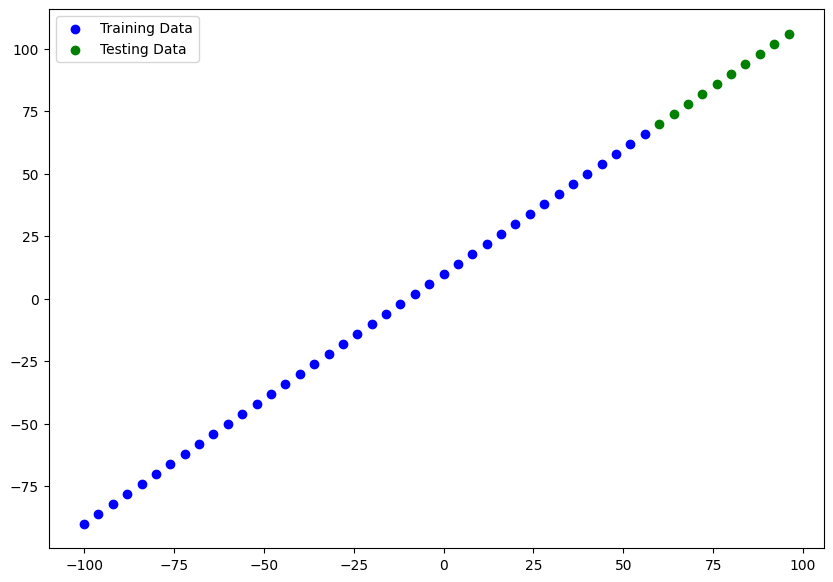

In [ ]:
plt.figure(figsize=(10,7))

# plot training data in blue
plt.scatter(X_train,y_train,c='b',label="Training Data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing Data")

# Show Legend
plt.legend();

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
],name="model_1")

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
    )

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learnt patterns or parameters from other models during **transfer learning*)

In [ ]:
# Lets fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Get summary of model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


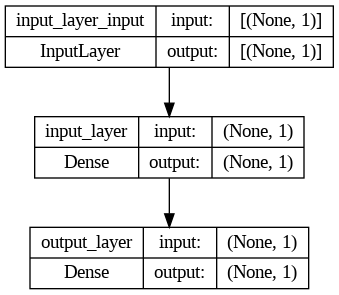

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

### Visualize Models Predictions

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 63ms/step


array([[34.760353],
       [36.98545 ],
       [39.21055 ],
       [41.435646],
       [43.660744],
       [45.88584 ],
       [48.11094 ],
       [50.33604 ],
       [52.561134],
       [54.786236]], dtype=float32)

In [ ]:
# lets create a plotting function
def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = y_pred):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  plt.scatter(test_data, test_labels, c="g", label="Test Data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")

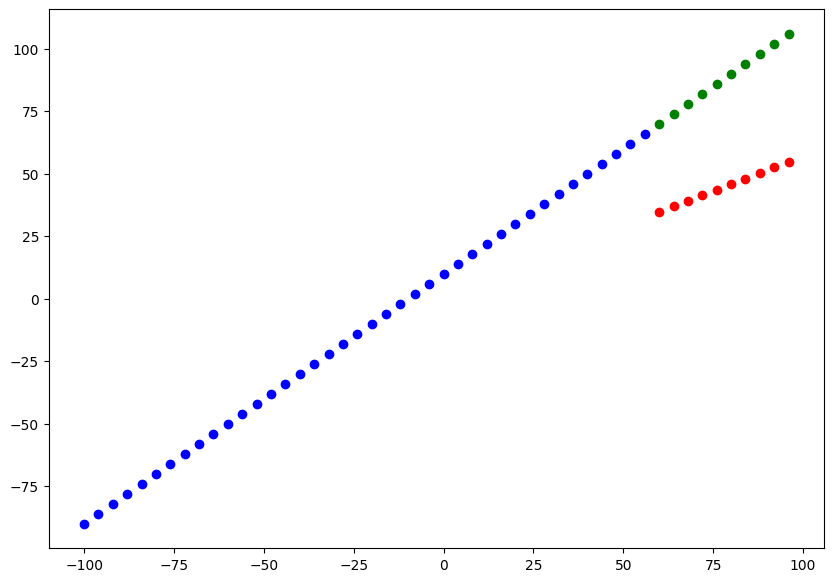

In [ ]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred)

### Evaluating our models predictions with regression evaluation metrics

When to use:
- MAE: Great starter for any regression problem
- MSE: When larger errors are mroe significant than smaller errors
-Huber: Combination of MSE and MAE. less sensitive to outliers than MSE

In [ ]:
# Evaluate model on test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 148ms/step - loss: 43.2267 - mae: 43.2267


[43.226707458496094, 43.226707458496094]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=tf.squeeze(y_test),y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=43.226707>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=tf.squeeze(y_test),y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1894.5378>

In [ ]:
X_train

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56], dtype=int32)>

In [ ]:
y_train

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66], dtype=int32)>

### Running experiments to improve our model

1. Get More Data (Good Data)
2. Make Model Larger (More Complex Models)
3. Train for longer - gove your model more of a chance to find patterns in the data.

Experiments:
- model_1: Same as original model, 1, 1 neuron, layer, trained for 100 epochs
- model_2: 2 layers, 10 neurons, trained for 100 epochs
- model_3: 2 layers, 10 neurons, trained for 100 epochs

In [ ]:
# Set random seed 42
tf.random.set_seed(42)

# create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
    ])

# Compile model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
    )

# Fit model
model_1.fit(X_train, y_train, epochs=100,verbose=0)

1/1 [==============================] - 0s 47ms/step


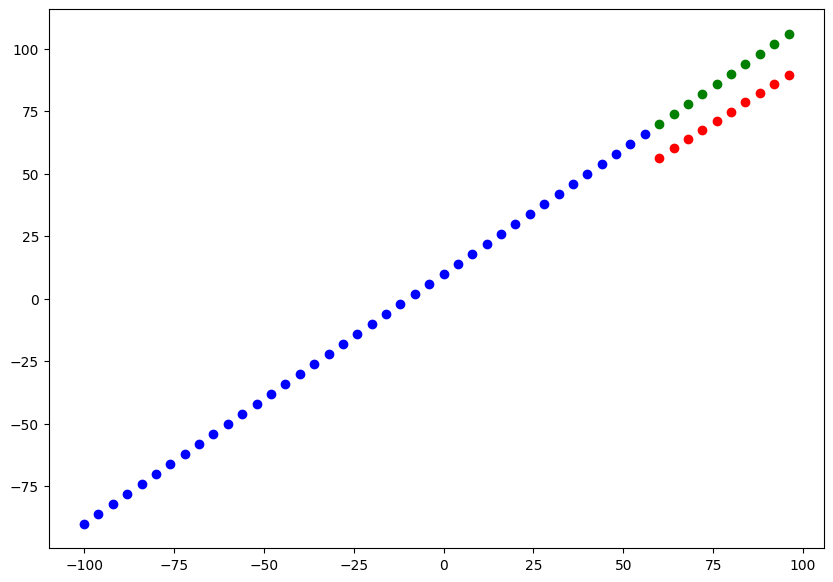

In [ ]:
# Plot Model 1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
mae_1 = tf.metrics.mean_absolute_error(y_true=tf.squeeze(y_test),y_pred=tf.squeeze(y_preds_1))
mse_1 = tf.metrics.mean_squared_error(y_true=tf.squeeze(y_test),y_pred=tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.93017>,
 <tf.Tensor: shape=(), dtype=float32, numpy=223.74939>)

In [ ]:
# Model 2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
    )

model_2.fit(X_train,y_train,epochs=100,verbose=0)

1/1 [==============================] - 0s 84ms/step


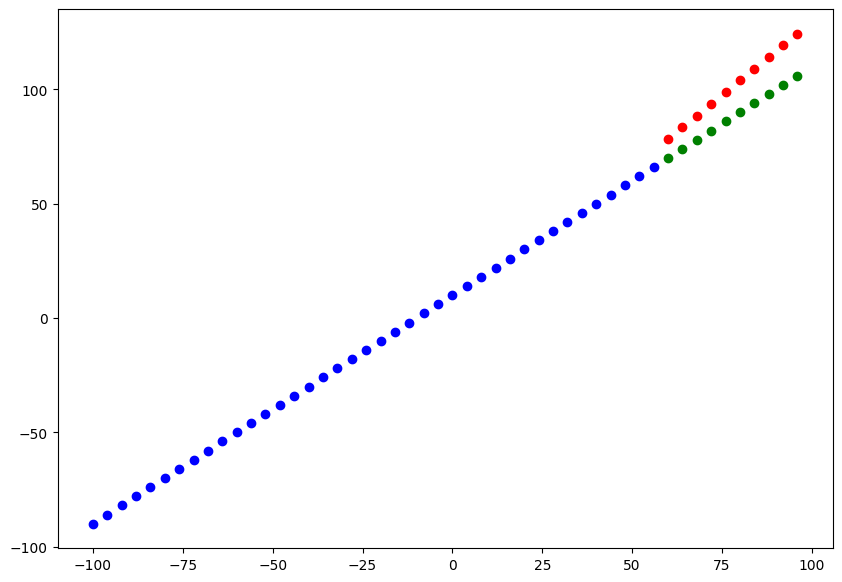

In [ ]:
y_preds_2 = model_2.predict(X_test)
y_preds_2
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2 = tf.metrics.mean_absolute_error(y_true=tf.squeeze(y_test),y_pred=tf.squeeze(y_preds_2))
mse_2 = tf.metrics.mean_squared_error(y_true=tf.squeeze(y_test),y_pred=tf.squeeze(y_preds_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.380999>,
 <tf.Tensor: shape=(), dtype=float32, numpy=189.17357>)

In [ ]:
# model 3
tf.random.set_seed(42)

# Create Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_3.fit(X_train,y_train,epochs=300,verbose=0)

1/1 [==============================] - 0s 59ms/step


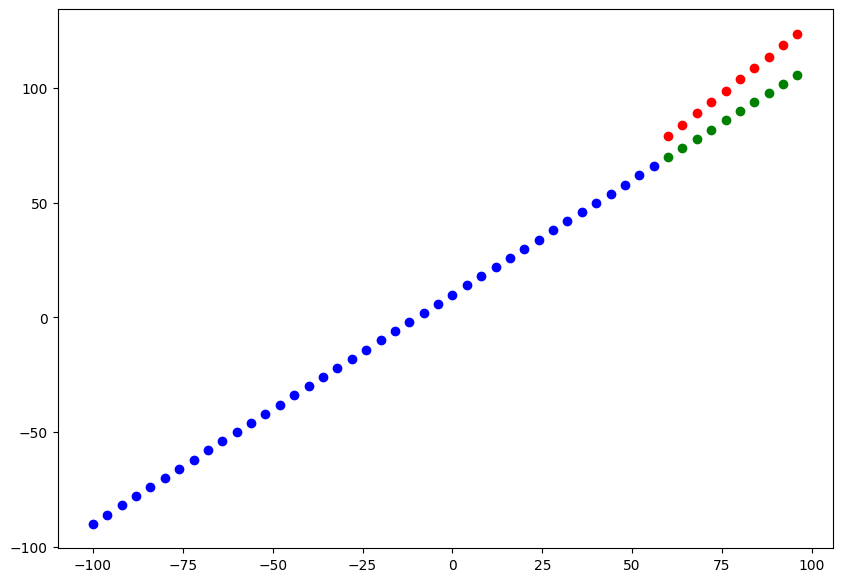

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3 = tf.metrics.mean_absolute_error(y_true=tf.squeeze(y_test),y_pred=tf.squeeze(y_preds_3))
mse_3 = tf.metrics.mean_squared_error(y_true=tf.squeeze(y_test),y_pred=tf.squeeze(y_preds_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=13.425995>,
 <tf.Tensor: shape=(), dtype=float32, numpy=187.95712>)

### Comparing the results of our experiments

In [ ]:
# Lets compare model results using pandas dataframe
import pandas as pd

In [ ]:
model_results = [
    ["model_1", mae_1.numpy(), mse_1.numpy()],
    ["model_2", mae_2.numpy(), mse_2.numpy()],
    ["model_3", mae_3.numpy(), mse_3.numpy()]
    ]

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,14.930170,223.749390
1,model_2,13.380999,189.173569
2,model_3,13.425995,187.957123


### Saving Models

1. The SavedModel format
2. The HDF5 format

In [ ]:
model_2.save("best_model")

In [ ]:
model_2.save("best_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Load Models

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model")
loaded_SavedModel_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
loaded_savedModel_format_preds = loaded_SavedModel_format.predict(X_test)
difference = tf.squeeze(loaded_savedModel_format_preds) == tf.squeeze(y_preds_2)
difference

1/1 [==============================] - 0s 63ms/step


<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

In [ ]:
loaded_H5_format = tf.keras.models.load_model("/content/best_model.h5")
loaded_H5_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
loaded_H5_format_preds = loaded_H5_format.predict(X_test)
difference = tf.squeeze(loaded_H5_format_preds) == tf.squeeze(y_preds_2)
difference

1/1 [==============================] - 0s 59ms/step


<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

## A Larger example

In [ ]:
import pandas as pd

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# One hot encode DataFrame
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot['charges']

In [ ]:
# Create training ans test sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [ ]:
# Build neural network
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Check the results of the insurance mdoel on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8859.0430 - mae: 8859.0430


[8859.04296875, 8859.04296875]

### Model not performing well. Try to Improve it.

In [ ]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

insurance_model_2.fit(X_train, y_train, epochs=500, verbose=0)

insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3636.9209 - mae: 3636.9209


[3636.9208984375, 3636.9208984375]

In [ ]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

history = insurance_model_3.fit(X_train, y_train, epochs=500, verbose=0)

insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3169.8943 - mae: 3169.8943


[3169.894287109375, 3169.894287109375]

Text(0.5, 0, 'epochs')

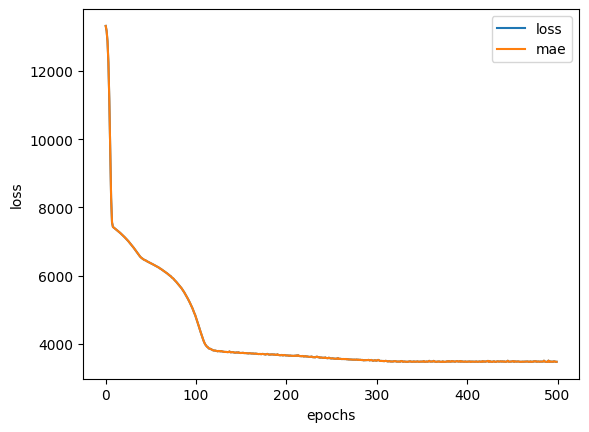

In [ ]:
# Plot insurance_model_3 (also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing data (normalization and standardization)

In [100]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [105]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turn all values in these columns between zero and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance['charges']

# Train Test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

# Fit column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normilization (MinMaxScaler & OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

### Build Model

In [111]:
tf.random.set_seed(42)

insurance_model_normal = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_normal.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

history = insurance_model_normal.fit(X_train_normal, y_train, epochs=500, verbose=0)

insurance_model_normal.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3161.2690 - mae: 3161.2690


[3161.26904296875, 3161.26904296875]

Text(0.5, 0, 'epochs')

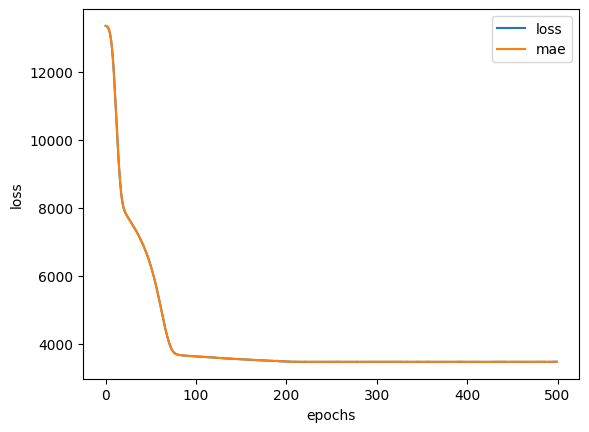

In [112]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Conclusion

Model is slighly better with normilization and standardization but most of the benefits come from the fact that the model can get to the same performance with less epochs